In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA
import os

%matplotlib inline

In [2]:
# import the raw data
raw = pd.read_csv('../RawData/AAPL_2015_2019.csv')

In [3]:
# check the info
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1256 non-null   object 
 1   Open       1256 non-null   float64
 2   High       1256 non-null   float64
 3   Low        1256 non-null   float64
 4   Close      1256 non-null   float64
 5   Adj Close  1256 non-null   float64
 6   Volume     1256 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.8+ KB


In [4]:
# check the first 5 rows
raw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-05,27.072500,27.162500,26.352501,26.562500,24.161013,257142000
1,2015-01-06,26.635000,26.857500,26.157499,26.565001,24.163294,263188400
2,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.502111,160423600
3,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.443539,237458000
4,2015-01-09,28.167500,28.312500,27.552500,28.002501,25.470825,214798000


In [5]:
# check the last 5 rows
raw.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1251,2019-12-23,70.132500,71.062500,70.092499,71.000000,70.287064,98572000
1252,2019-12-24,71.172501,71.222504,70.730003,71.067497,70.353882,48478800
1253,2019-12-26,71.205002,72.495003,71.175003,72.477501,71.749733,93121200
1254,2019-12-27,72.779999,73.492500,72.029999,72.449997,71.722488,146266000
1255,2019-12-30,72.364998,73.172501,71.305000,72.879997,72.148178,144114400


In [6]:
# read the data again and change it to datatime dataframe
dt_raw = pd.read_csv('..\RawData\AAPL_2015_2019.csv',parse_dates=['Date'],index_col='Date')

In [7]:
# check the info
dt_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2015-01-05 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1256 non-null   float64
 1   High       1256 non-null   float64
 2   Low        1256 non-null   float64
 3   Close      1256 non-null   float64
 4   Adj Close  1256 non-null   float64
 5   Volume     1256 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.7 KB


In [8]:
# check the first 5 rows
dt_raw.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-05,27.072500,27.162500,26.352501,26.562500,24.161013,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,24.163294,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.502111,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.443539,237458000
2015-01-09,28.167500,28.312500,27.552500,28.002501,25.470825,214798000


In [9]:
# check the last 5 rows
dt_raw.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,70.287064,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,70.353882,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,71.749733,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,71.722488,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,72.148178,144114400


In [10]:
# group the data from daily to weekly, first day's price as Open, highest price during the week as High,
#   lowest price during the week as Low, last day's price as Close and Adj Close, sum during the week as Volume. 
from pandas.tseries.frequencies import to_offset
loffset= '-6D'
dt_weekly = dt_raw.resample('W').apply(
                            {'Open': 'first', 'High': 'max', 'Low': 'min','Close': 'last', 'Adj Close': 'last', 'Volume': 'sum'}
                            )
dt_weekly.index = dt_weekly.index + to_offset(loffset)

In [11]:
# check the weekly data
dt_weekly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-05,27.072500,28.312500,26.157499,28.002501,25.470825,1133010000
2015-01-12,28.150000,28.200001,26.299999,26.497499,24.101887,1216906400
2015-01-19,26.959999,28.437500,26.625000,28.245001,25.691397,794948000
2015-01-26,28.434999,30.000000,27.257500,29.290001,26.641926,1863370800
2015-02-02,29.512501,30.127501,29.020000,29.732500,27.151154,1083029200
...,...,...,...,...,...,...
2019-12-02,66.817497,67.750000,64.072502,67.677498,66.997925,456599200
2019-12-09,67.500000,68.824997,66.227501,68.787498,68.096771,568117600
2019-12-16,69.250000,70.662498,69.245003,69.860001,69.158508,732720000


<AxesSubplot:xlabel='Date'>

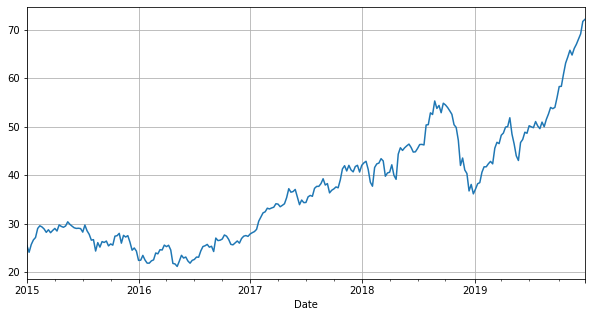

In [12]:
# plot the data to check the basic trend of Adj Close price for 5 years
dt_weekly['Adj Close'].plot(figsize =(10,5), grid=True)

<AxesSubplot:xlabel='Date'>

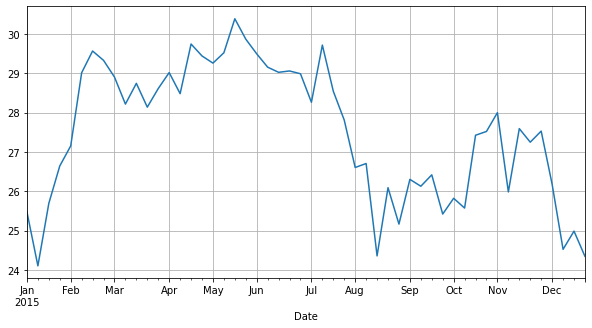

In [13]:
# plot the data to check the basic trend of Adj Close price for one year (2015)
dt_weekly['2015']['Adj Close'].plot(figsize =(10,5), grid=True)

<AxesSubplot:xlabel='Date'>

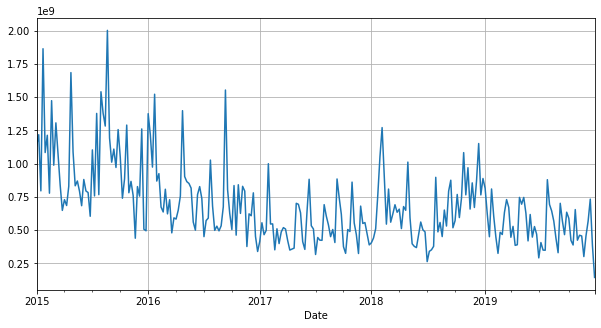

In [14]:
# plot the data to check the trend for trading volume for 5 years
dt_weekly['Volume'].plot(figsize =(10,5), grid=True)

<AxesSubplot:xlabel='Date'>

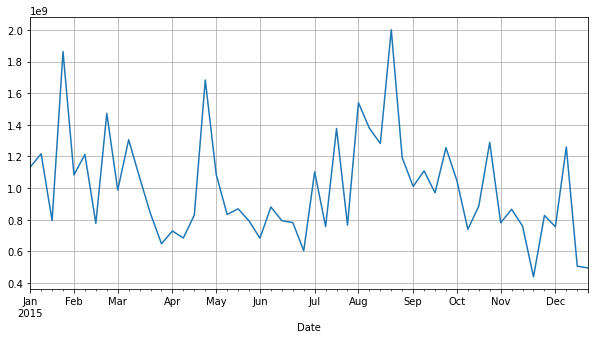

In [15]:
# plot the data to check the trend for trading volume for one year 
dt_weekly['2015']['Volume'].plot(figsize =(10,5), grid=True)

In [17]:
# save the data to new csv file for next step
dt_weekly.to_csv('dt_weekly.csv')